Insight 1: "What is the correlation between Bitcoin and the S&P 500 during periods of economic crisis?"

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')
btc_sp500_price_volume = pd.read_csv('./Data/btc_sp500_price_volume_merged.csv')

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
btc_sp500_price_volume['Date'] = pd.to_datetime(btc_sp500_price_volume['Date'])

In [19]:
# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

# Merge the datasets based on the Date column
merged_data = pd.merge(btc_data[['Date', 'BTC_Price']], sp500_data[['Date', 'SP500_Price']], on="Date")

In [20]:
def analyze_period(data, start_date, end_date, title, line_color_BTC='orange', line_color_SP_500='blue'):
  """ 
  Parameters:
    - data: DataFrame with the combined data of BTC and S&P 500.
    - start_date: Start of the analysis period (str in 'YYYY-MM-DD' format).
    - end_date: End of the analysis period (str in 'YYYY-MM-DD' format).
    - title: Title for the charts.
    - line_color: Color for the Bitcoin line in the charts (str).
    
  Returns:
    - Calculated correlation (float).
  """
  # Filter data by date range
  period_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
  
  # Calculate Correlation
  correlation = period_data[['BTC_Price', 'SP500_Price']].corr().iloc[0, 1] # this use the Pearson correlation 
  print(f"The correlation between Bitcoin and S&P 500 during {title} is: {correlation:.4f}")
  
  # Set Graphic styles
  sns.set_theme(style='whitegrid')
  plt.figure(figsize=(14, 8))
  
  # Graphic for the temporal series
  plt.subplot(2, 1, 1)
  plt.plot(period_data['Date'], period_data['BTC_Price'], label='Bitcoin', color=line_color_BTC, alpha=0.8)
  plt.plot(period_data['Date'], period_data['SP500_Price'], label='S&P 500', color=line_color_SP_500, alpha=0.8)
  plt.title(f"Bitcoin vs S&P 500 Prices ({title})", fontsize=14)
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  
  # Scatter plot with regression line 
  plt.subplot(2, 1, 2)  
  sns.regplot(
    x='BTC_Price',
    y='SP500_Price',
    data=period_data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red', 'alpha': 0.6}
  )
  plt.title(f"Correlation Between Bitcoin and S&P 500 ({title})", fontsize=14)
  plt.xlabel('Bitcoin Price')
  plt.ylabel('S&P 500 Price')
  
  # Adjust design and show
  plt.tight_layout()
  plt.show()
  
  return correlation
  

#### Insight 1: "What is the correlation between Bitcoin and the S&P 500 during periods of economic crisis? (2020-01 to 2021-12)"

The correlation between Bitcoin and S&P 500 during COVID-19 Crisis (2020-2021) is: 0.8779


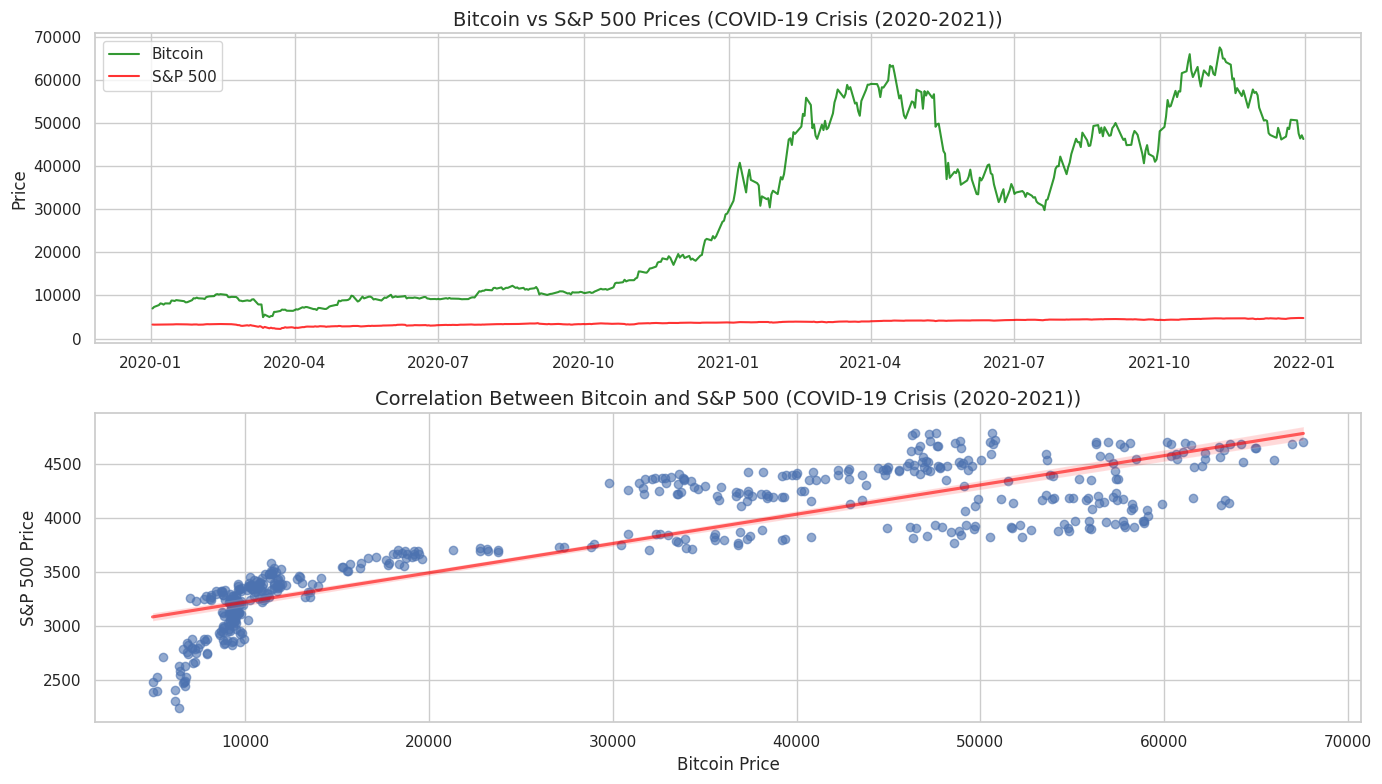

In [21]:
covid_correlation = analyze_period(
    merged_data, 
    '2020-01-01', 
    '2021-12-31', 
    'COVID-19 Crisis (2020-2021)', 
    line_color_BTC='green',
    line_color_SP_500='red'
)

#### Correlation with BTC and S&P 500 during Supply and energy Crisis 2021-2022 (Still covid issues and Ukraine-Russia War)

The correlation between Bitcoin and S&P 500 during Supply and Energy Crisis (2021-2022) is: 0.6018


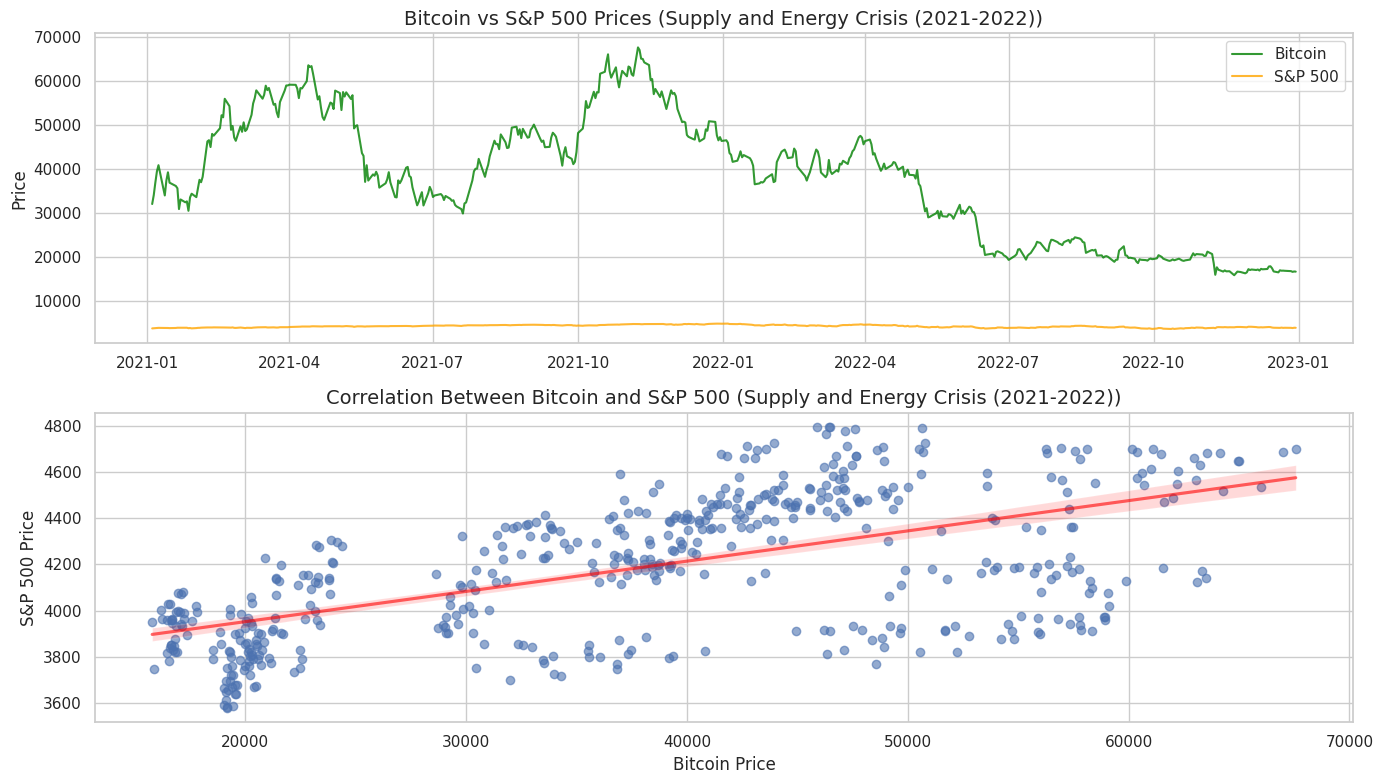

In [22]:
supply_crisis_correlation = analyze_period(
    merged_data, 
    '2021-01-01', 
    '2022-12-31', 
    'Supply and Energy Crisis (2021-2022)', 
    line_color_BTC='green',
    line_color_SP_500='orange'
)

#### Correlation with BTC and S&P 500, economic crisis 2023-2024

The correlation between Bitcoin and S&P 500 during Economic Crisis (2023-2024) is: 0.9076


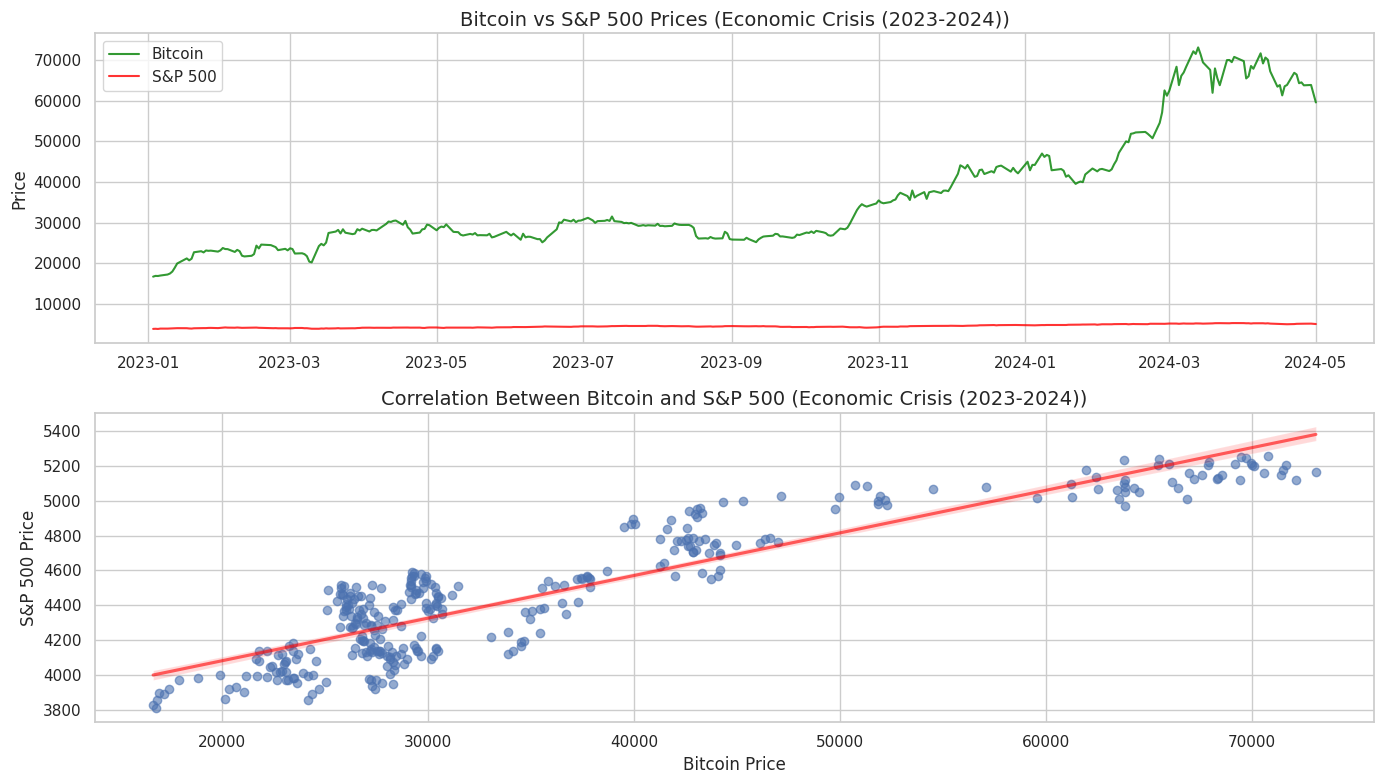

In [23]:
economic_crisis_correlation = analyze_period(
    merged_data, 
    '2023-01-01', 
    '2024-05-01', 
    'Economic Crisis (2023-2024)',
    line_color_BTC='green',
    line_color_SP_500='red'
)

#### Table of Price correlations between the different periods of time

In [24]:
results = pd.DataFrame({
    'Period': ['COVID-19 Crisis', 'Supply and Energy Crisis', 'Economic Crisis'],
    'Correlation': [covid_correlation, supply_crisis_correlation, economic_crisis_correlation]
})
print(results)


                     Period  Correlation
0           COVID-19 Crisis     0.877928
1  Supply and Energy Crisis     0.601778
2           Economic Crisis     0.907637


#### Table of Volume correlations: BTC volumen vs S&P 500 and viceversa

In [ ]:
# Calculate General Correlations

btc_volume_sp500_price_corr = btc_sp500_price_volume[['BTC_Volume', 'SP500_Price']].corr().iloc[0, 1]
sp500_volume_btc_price_corr = btc_sp500_price_volume[['SP500_Volume', 'BTC_Price']].corr().iloc[0, 1]

# Define the crisis periods
crisis_periods = {
    "COVID-19 Crisis": ("2020-03-01", "2021-12-31"),
    "Supply and Energy Crisis": ("2021-01-01", "2022-12-31"),
    "Economic Crisis 2023-2024": ("2023-01-01", "2024-05-01")
}

In [27]:
# Calculate correlations for all the crisis periods
period_volume_price_correlations = []

for period_name, (start_date, end_date) in crisis_periods.items():
  filtered_data = btc_sp500_price_volume[(btc_sp500_price_volume['Date'] >= start_date) & (btc_sp500_price_volume['Date'] <= end_date)]
  if not filtered_data.empty:
    btc_volume_sp500_price = filtered_data[['BTC_Volume', 'SP500_Price']].corr().iloc[0, 1]
    sp500_volume_btc_price = filtered_data[['SP500_Volume', 'BTC_Price']].corr().iloc[0, 1]
    period_volume_price_correlations.append({
      "Period": period_name,
      "BTC Volume vs S&P 500 Price": btc_volume_sp500_price,
      "S&P 500 Volume vs BTC Price": sp500_volume_btc_price
    })
    
# Merge the general correlations with the crisis periods
correlation_volume_price_df = pd.DataFrame([{
  "Period": "Overall",
  "BTC Volume vs S&P 500 Price": btc_volume_sp500_price_corr,
  "S&P 500 Volume vs BTC Price": sp500_volume_btc_price_corr
}] + period_volume_price_correlations)

# Show the results
correlation_volume_price_df

,Period,BTC Volume vs S&P 500 Price,S&P 500 Volume vs BTC Price
0,Overall,0.664644,0.221564
1,COVID-19 Crisis,0.096378,-0.340944
2,Supply and Energy Crisis,-0.269074,-0.049633
3,Economic Crisis 2023-2024,0.468544,-0.028447


Generating CSV files for presentation in Power BI/Tableau

In [ ]:
correlation_results = pd.DataFrame({
  'Period': ['Covid-19 Crisis', 'Supply and Energy Crisis', 'Economic Crisis'],
  'Start Date': ['2020-01-01', '2021-01-01', '2023-01-01'],
  'End Date': ['2021-12-31', '2022-12-31', '2024-05-01'],
  'Correlation': [covid_correlation, supply_crisis_correlation, economic_crisis_correlation]
})

# Check that dataframe is ok
correlation_results

# Save the results as CSV file
correlation_results.to_csv('./Data/correlation_results.csv', index=False)